In [34]:
# Description: A random forests machine learning model for predicting bank customer churn

In [35]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [36]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/kaggle/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [37]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [38]:
# drop unnecessary information
df.drop(['RowNumber', 'Surname'], axis=1, inplace=True)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [39]:
# look at data metrics
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
# explore data for missing values
df.isnull().sum()

,0
CustomerId,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0


In [41]:
# explore unique values of geography column
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [42]:
# initialise label encoder to object types
le = LabelEncoder()
df[['Geography', 'Gender']] = df[['Geography', 'Gender']].apply(le.fit_transform)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [43]:
# observe new datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  int64  
 3   Gender           10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [44]:
# store independant variables in a variable called 'X'
X = df.drop(['CustomerId','Exited'], axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [45]:
# create a dependent variable 'Y'
Y = df['Exited']
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [46]:
# split data into training and testing
split = int(0.7 * len(df))

X_train = X[:split]
X_test = X[split:]

Y_train = Y[:split]
Y_test = Y[split:]

# Random Forests Classifier

In [47]:
# create machine learning model for random forests classifier
rfc = RandomForestClassifier().fit(X_train, Y_train)

In [48]:
# observe model score
rfc.score(X_train, Y_train)

1.0

In [49]:
# rfc model predictions
rfc_predictions = rfc.predict(X_test)
rfc_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
# observe classification report
print(classification_report(Y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2406
           1       0.76      0.46      0.58       594

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000



In [51]:
# observe accuracy score in percentage form
accuracy_score(Y_test, rfc_predictions)
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, rfc_predictions) * 100, 2)}%')

Accuracy score percentage: 86.5%


In [52]:
# feature importance
rfc.feature_importances_
rfc_features = X.columns

# data frame for features and importance scores
rfc_feature_importance = pd.DataFrame({'Feature': rfc_features, 'Importance': rfc.feature_importances_})
rfc_feature_importance.sort_values(by='Importance', ascending=False)
rfc_feature_importance

,Feature,Importance
0,CreditScore,0.143563
1,Geography,0.037323
2,Gender,0.019639
3,Age,0.244042
4,Tenure,0.081865
5,Balance,0.136553
6,NumOfProducts,0.129040
7,HasCrCard,0.020442
8,IsActiveMember,0.040892
9,EstimatedSalary,0.146642


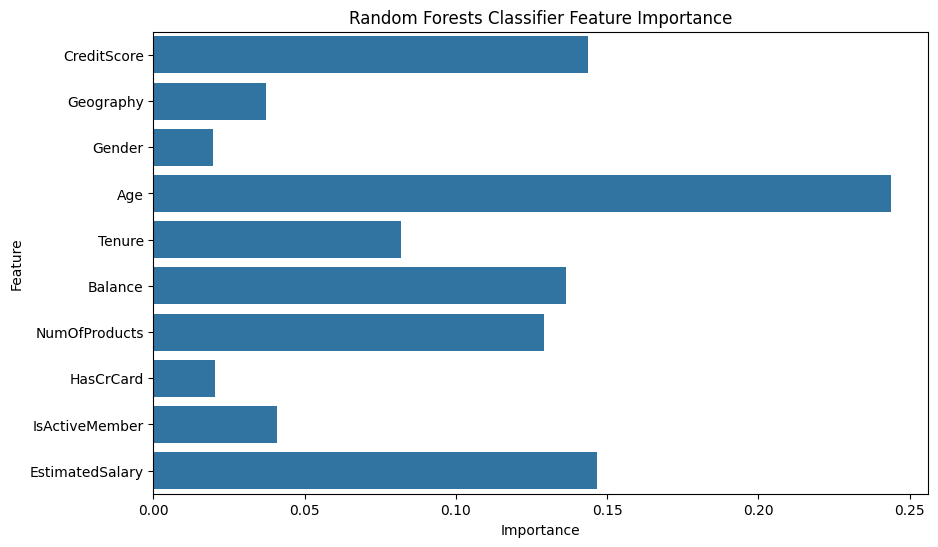

In [53]:
# feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rfc_feature_importance)
plt.title('Random Forests Classifier Feature Importance')
plt.show()

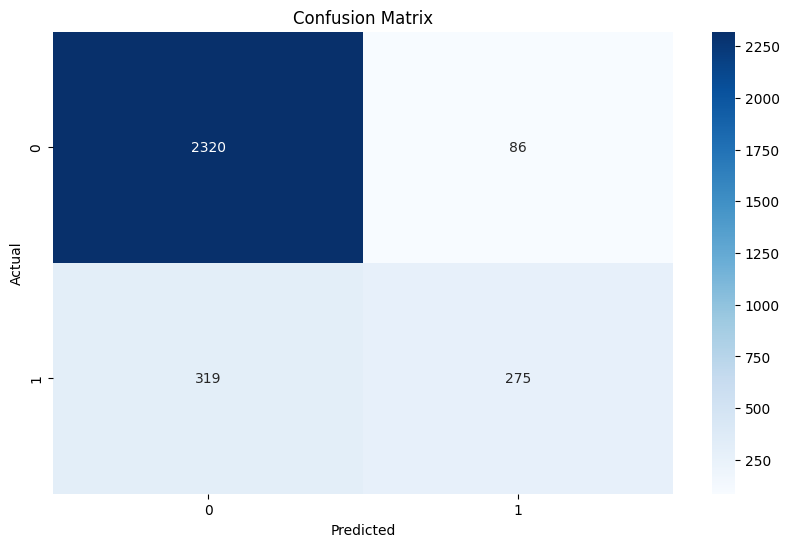

In [54]:
# plot confusion matrix
confusion_matrix(Y_test, rfc_predictions)

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, rfc_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

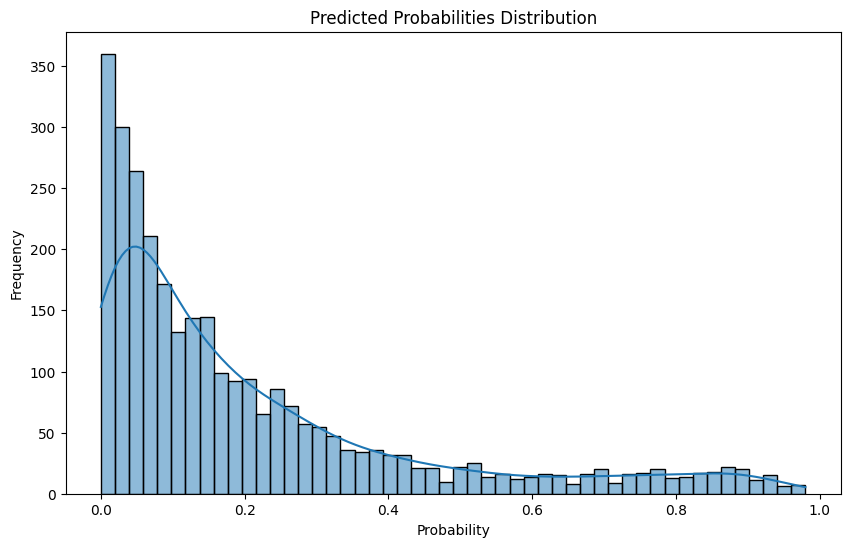

In [55]:
# distribution of predicted probabilities
rfc_y_proba = rfc.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(rfc_y_proba, bins=50, kde=True)
plt.title('Predicted Probabilities Distribution')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

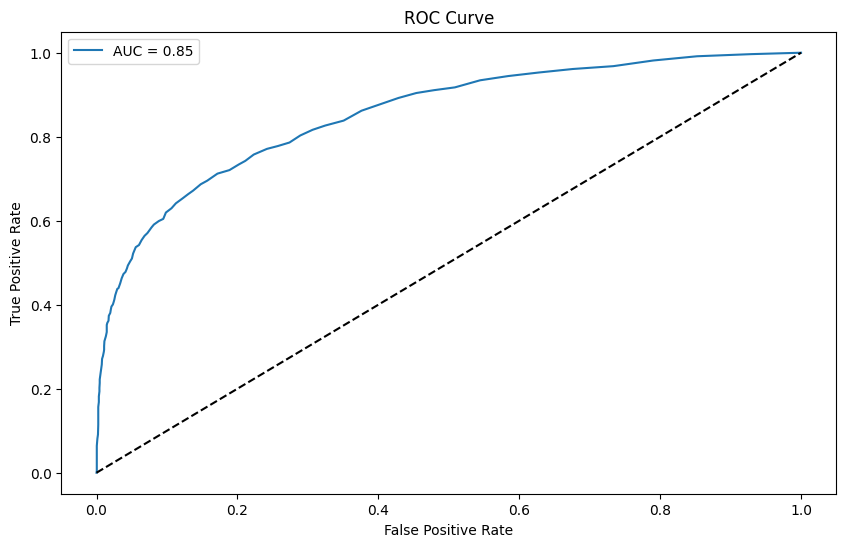

In [56]:
# ROC curve and AUC
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(Y_test, rfc_y_proba)
plt.figure(figsize=(10, 6))
plt.plot(rfc_fpr, rfc_tpr, label=f'AUC = {auc(rfc_fpr, rfc_tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Logistic Regression

In [57]:
# create machine learning model for logistic regression
lr = LogisticRegression().fit(X_train, Y_train)

In [58]:
# observe model score
lr.score(X_train, Y_train)

0.7877142857142857

In [59]:
# lr model predictions
lr_predictions = lr.predict(X_test)
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
# observe classification report
print(classification_report(Y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      2406
           1       0.38      0.06      0.10       594

    accuracy                           0.79      3000
   macro avg       0.59      0.52      0.49      3000
weighted avg       0.72      0.79      0.73      3000



In [61]:
# observe accuracy score in percentage form
accuracy_score(Y_test, lr_predictions)
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, lr_predictions) * 100, 2)}%')

Accuracy score percentage: 79.47%


In [62]:
# feature importance (using coeffecients)
lr.coef_[0]
lr_features = X.columns

# data frame for features and importance scores
lr_feature_importance = pd.DataFrame({'Feature': lr_features, 'Coefficients': lr.coef_[0]})
lr_feature_importance.sort_values(by='Coefficients', ascending=False)
lr_feature_importance

,Feature,Coefficients
0,CreditScore,-0.005025
1,Geography,0.000188
2,Gender,-0.001100
3,Age,0.044762
4,Tenure,-0.001098
5,Balance,0.000003
6,NumOfProducts,-0.000510
7,HasCrCard,-0.000178
8,IsActiveMember,-0.001423
9,EstimatedSalary,-0.000001


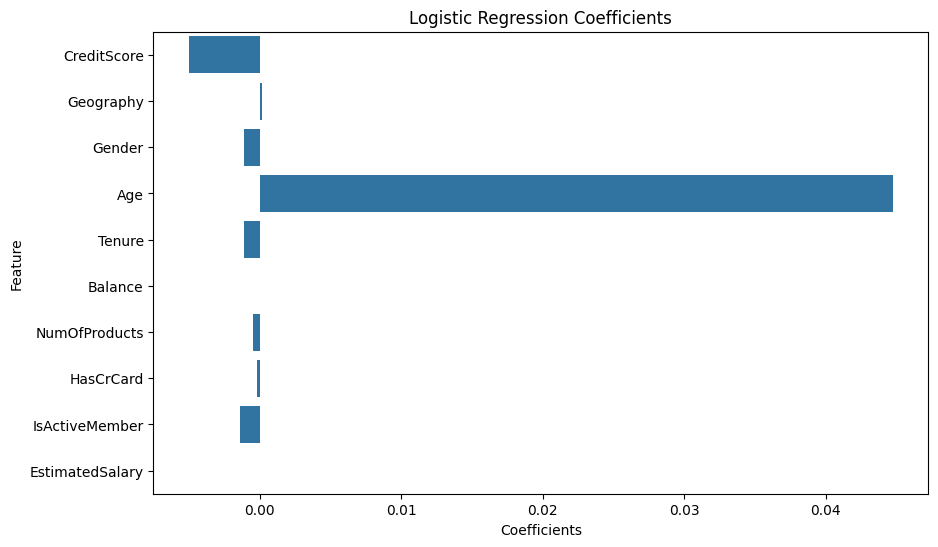

In [64]:
# feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Feature', data=lr_feature_importance)
plt.title('Logistic Regression Coefficients')
plt.show()

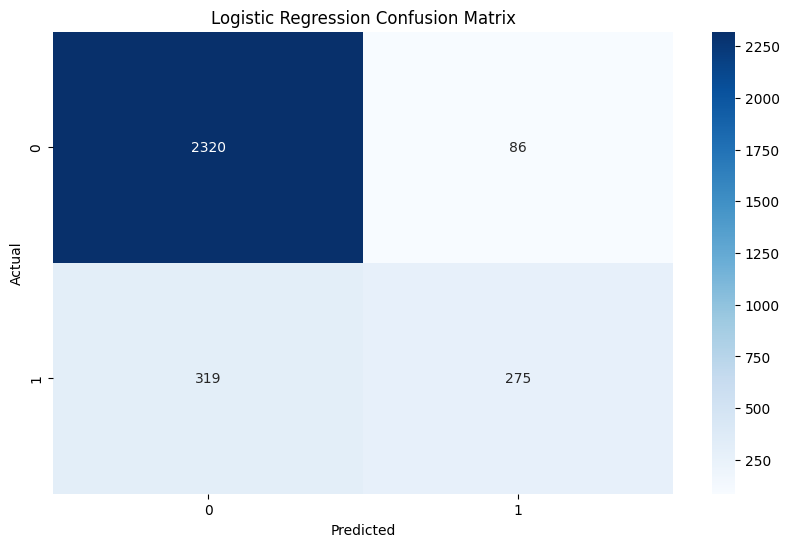

In [65]:
# plot confusion matrix for logistic Regression
confusion_matrix(Y_test, lr_predictions)

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, rfc_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

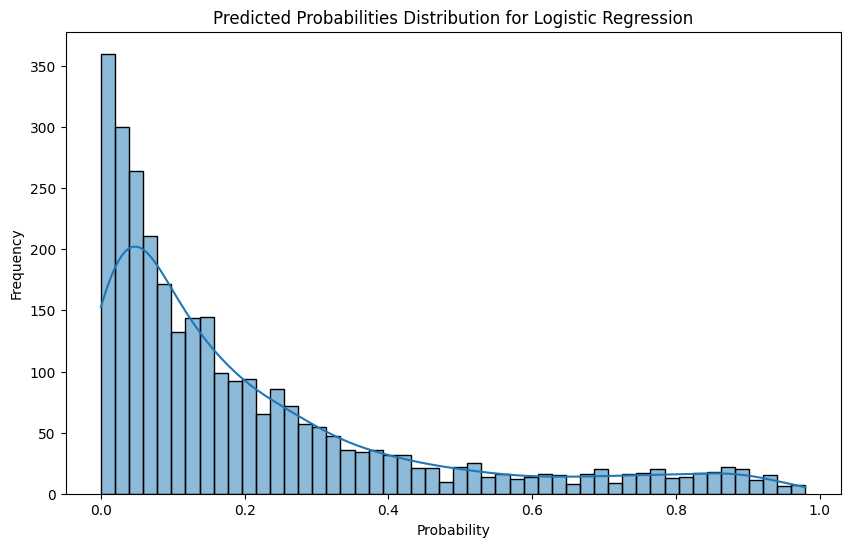

In [66]:
# distribution of predicted probabilities
lr_y_proba = lr.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(rfc_y_proba, bins=50, kde=True)
plt.title('Predicted Probabilities Distribution for Logistic Regression')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

# Gradient Boosting Classifier

In [67]:
# create machine learning model for gradient boosting classifier
gbc = GradientBoostingClassifier().fit(X_train, Y_train)

In [68]:
# observe model score
gbc.score(X_train, Y_train)

0.868

In [69]:
# lr model predictions
gbc_predictions = gbc.predict(X_test)
gbc_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
# observe classification report
print(classification_report(Y_test, gbc_predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2406
           1       0.78      0.47      0.59       594

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [71]:
# observe accuracy score in percentage form
accuracy_score(Y_test, gbc_predictions)
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, gbc_predictions) * 100, 2)}%')

Accuracy score percentage: 87.0%


In [72]:
# feature importance
gbc.feature_importances_
gbc_features = X.columns

# data frame for features and importance scores
gbc_feature_importance = pd.DataFrame({'Feature': gbc_features, 'Importance': gbc.feature_importances_})
gbc_feature_importance.sort_values(by='Importance', ascending=False)
gbc_feature_importance

,Feature,Importance
0,CreditScore,0.014818
1,Geography,0.035076
2,Gender,0.018210
3,Age,0.407334
4,Tenure,0.003099
5,Balance,0.069952
6,NumOfProducts,0.298447
7,HasCrCard,0.001254
8,IsActiveMember,0.130397
9,EstimatedSalary,0.021412


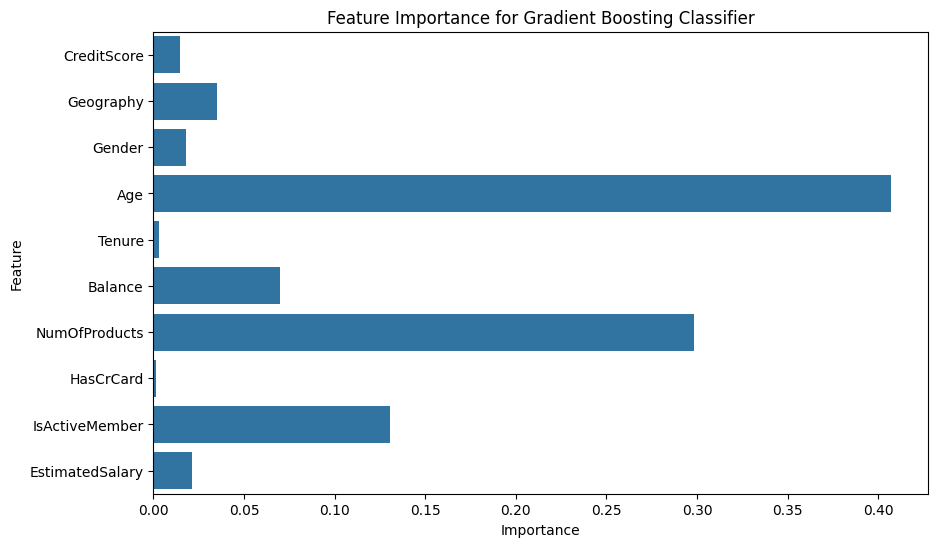

In [76]:
# feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gbc_feature_importance)
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.show()

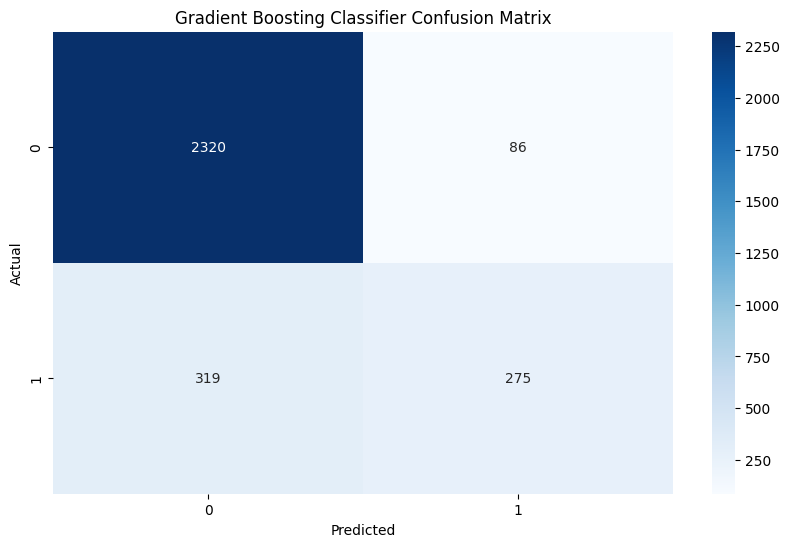

In [74]:
# plot confusion matrix for logistic Regression
confusion_matrix(Y_test, gbc_predictions)

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, rfc_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

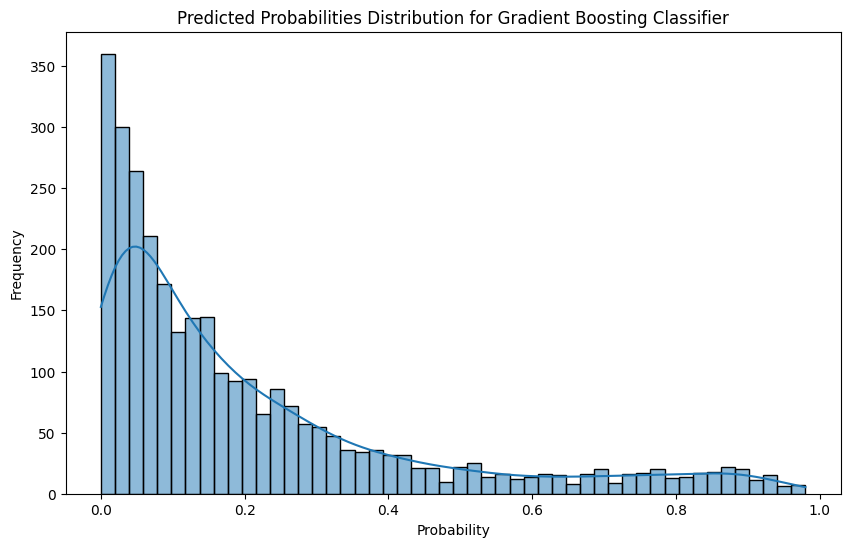

In [75]:
# distribution of predicted probabilities
gbc_y_proba = gbc.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(rfc_y_proba, bins=50, kde=True)
plt.title('Predicted Probabilities Distribution for Gradient Boosting Classifier')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()